# Scraping Conservation Nonprofit Mission, Vision, and Values

The goal of this code is to pull webpages containing mission, vision, and/or values statements for 10 conservation nonprofits. The text from these pages will be written to a text file, tokenized, and processed for basic analyses. 

In [1]:
import requests  # To get the pages
from bs4 import BeautifulSoup # and to process them

from time import sleep      # Allowing us to pause between pulls
from random import random   # And allowing that pause to be random

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

sw = stopwords.words("english")

In [2]:
from bs4.element import Comment

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True



##Creating a file name for URL
def generate_filename_from_url(url) :
    
    if not url :
        return None
    
    # drop the http or https
    name = url.replace("https","").replace("http","")

    # Replace useless chareacters with UNDERSCORE
    name = name.replace("://","").replace(".","_").replace("/","_")
    
    # remove last underscore
    last_underscore_spot = name.rfind("_")
    
    name = name[:last_underscore_spot] + name[(last_underscore_spot+1):]

    # tack on .txt
    name = name + ".txt"
    
    return(name)




The code below creates a dictionary that contains the web pages for each nonprofit that contain mission, vision, and/or values statements. By creating a dictionary, I can later on add in sections that store web pages leading to press releases or social media.

In [3]:
nonprofit_pages = dict()

nonprofit_pages["about_us"] = """
https://www.rmef.org/how-we-conserve/
https://www.backcountryhunters.org/mission_and_values
https://www.sierraclub.org/our-vision
https://www.boone-crockett.org/snapshot-boone-and-crockett-club
https://www.worldwildlife.org/initiatives
https://www.nature.org/en-us/about-us/who-we-are/our-mission-vision-and-values/
https://defenders.org/about
https://oceanconservancy.org/about/
https://www.ducks.org/conservation/how-du-conserves-wetlands-and-waterfowl
https://www.tu.org/conservation/our-approach/
""".split()


In [4]:
for page in nonprofit_pages :  
    for link in nonprofit_pages[page] : 
        output_file_name = generate_filename_from_url(link) #Using the function created above, create a file name
        
        # pull the page 
        try:
            r = requests.get(link)
        except :
            pass
        
        # process the page if r status code is 200 (successful pull)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'html.parser')
            texts=soup.findAll(text=True)
            visible_texts = filter(tag_visible, texts)
        
        
        # write out the page to a file with the appropriate name
        with open(output_file_name,'w',encoding = "UTF-8") as outfile :
            outfile.write(" ".join(t.strip() for t in visible_texts))
            
    # Pause for a bit
    wait_time = 5 + random()*10
    print(f"Waiting for {wait_time:.02f} seconds.")
        
    sleep(wait_time)

Waiting for 13.07 seconds.


At this point, I have 10 text files that contain text from "About Us" pages that contain an organization's mission, vision, and or values. Below, I have code that tokenizes each text file, cleans it up, and then looks at the most comon tokens. Additionally, a frequency distribution is created for each nonprofit's clean tokens. I also briefly list some of the more notable most common words from each nonprofit's mission, vision, and/or values tokens.

ROCKY MOUNTAIN ELK FOUNDATION (RMEF):

The list of 20 most common words includes: rmef, elk, hunting, conserve, conservation, partners, wildlife, access, habitat, and heritage.

In [5]:
##Opening each text file and tokenizing
rmef = open('www_rmef_org_how-we-conserve.txt', "r", encoding="Latin-1")
rmef_mission = rmef.read() 
rmef_tokens = nltk.word_tokenize(rmef_mission)

clean_rmef_tokens=[]

for tokens in rmef_tokens: ##For each token in rmef_tokens
    
    if tokens not in sw and tokens.isalpha():  ##If the token is not within object sw and is an alphabetical character
        clean_rmef_tokens.append(tokens.lower()) ##add to empty list called filtered and wrap in lowercase
    
rmef_common_words=Counter(clean_rmef_tokens).most_common(20)   
print(rmef_common_words)

[('rmef', 29), ('elk', 19), ('hunting', 9), ('we', 7), ('conserve', 7), ('conservation', 7), ('join', 5), ('partners', 5), ('wildlife', 5), ('access', 5), ('habitat', 5), ('heritage', 5), ('donate', 4), ('get', 4), ('support', 4), ('our', 4), ('shop', 4), ('gear', 4), ('how', 4), ('news', 4)]


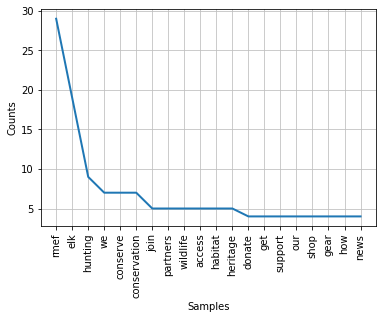

412


In [27]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_rmef_tokens)
fdist.plot(20)
print(len(clean_rmef_tokens))

BACKCOUNTRY HUNTERS AND ANGLERS: (BHA)

The list of 20 most common words includes: bha, backcountry, wild, waters, wilderness, hunters, lands, anglers, public, hunting, access, places, values, us

In [7]:
bha = open('www_backcountryhunters_org_mission_andvalues.txt', "r", encoding="Latin-1")
bha_mission = bha.read() 
bha_tokens = nltk.word_tokenize(bha_mission)

clean_bha_tokens=[]

for tokens in bha_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_bha_tokens.append(tokens.lower())
    
bha_common_words=Counter(clean_bha_tokens).most_common(20) 
print(bha_common_words)

[('bha', 20), ('backcountry', 16), ('wild', 12), ('waters', 10), ('wilderness', 10), ('hunters', 9), ('lands', 8), ('anglers', 8), ('about', 7), ('issues', 7), ('us', 7), ('public', 7), ('hunting', 7), ('join', 6), ('get', 6), ('access', 6), ('a', 6), ('places', 6), ('chapters', 5), ('values', 5)]


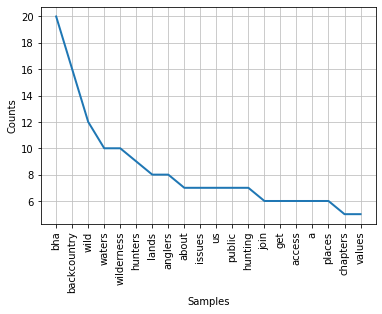

724


In [29]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_bha_tokens)
fdist.plot(20)
print(len(clean_bha_tokens))

SIERRA CLUB:

The list of 20 most common words includes: sierra, club, icon, climate, we, protect, clean, location, stories, crisis, water, protecting, democracy

In [9]:
sierra = open('www_sierraclub_orgour-vision.txt', "r", encoding="Latin-1")
sierra_mission = sierra.read() 
sierra_tokens = nltk.word_tokenize(sierra_mission)

clean_sierra_tokens=[]

for tokens in sierra_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_sierra_tokens.append(tokens.lower())
    
sierra_common_words=Counter(clean_sierra_tokens).most_common(20) 
print(sierra_common_words)

[('sierra', 21), ('club', 16), ('icon', 13), ('us', 11), ('our', 11), ('climate', 11), ('we', 9), ('protect', 8), ('about', 8), ('clean', 7), ('location', 6), ('stories', 6), ('join', 6), ('crisis', 6), ('the', 6), ('your', 5), ('donate', 5), ('water', 5), ('protecting', 5), ('democracy', 5)]


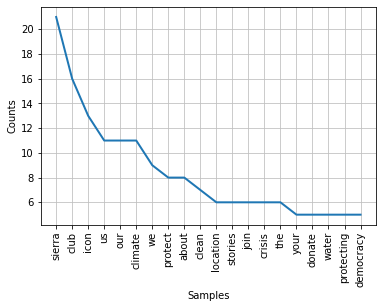

637


In [30]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_sierra_tokens)
fdist.plot(20)
print(len(clean_sierra_tokens))

WORLD WILDLIFE FEDERATION: (WWF)

The list of 20  most common words includes: work (##1, interesting because it's not the organization's name), wwf, conservation, our, people, toggle, wildlife, view, partnerships, nature, world, species

In [11]:

wwf = open('www_worldwildlife_orginitiatives.txt', "r", encoding="Latin-1")
wwf_mission = wwf.read() 
wwf_tokens = nltk.word_tokenize(wwf_mission)

clean_wwf_tokens=[]

for tokens in wwf_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_wwf_tokens.append(tokens.lower())
    
wwf_common_words=Counter(clean_wwf_tokens).most_common(20) 
print(wwf_common_words)

[('work', 16), ('wwf', 13), ('conservation', 11), ('our', 11), ('people', 10), ('toggle', 8), ('wildlife', 8), ('view', 8), ('partnerships', 8), ('nature', 8), ('make', 7), ('dropdown', 6), ('links', 6), ('we', 6), ('every', 6), ('adopt', 5), ('world', 5), ('search', 5), ('places', 5), ('species', 5)]


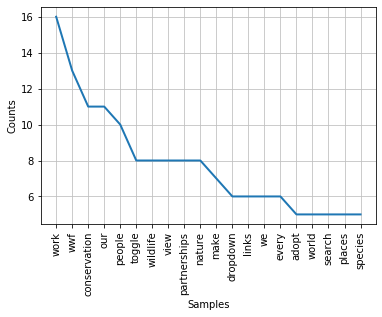

591


In [31]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_wwf_tokens)
fdist.plot(20)
print(len(clean_wwf_tokens))

TROUT UNLIMITED: (TU)

The list of 20 most common words includes: conservation (#1), trout, tu, coldwater, fishing, unlimited, stream, local, fish, habitat, work, protect

In [13]:
tu = open('www_tu_org_conservation_our-approach.txt', "r", encoding="Latin-1")
tu_mission = tu.read() 
tu_tokens = nltk.word_tokenize(tu_mission)

clean_tu_tokens=[]

for tokens in tu_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_tu_tokens.append(tokens.lower())
    
tu_common_words=Counter(clean_tu_tokens).most_common(20) 
print(tu_common_words)

[('conservation', 29), ('trout', 23), ('tu', 12), ('coldwater', 12), ('find', 12), ('our', 11), ('donate', 11), ('fishing', 10), ('get', 10), ('unlimited', 9), ('stream', 8), ('membership', 8), ('local', 8), ('fish', 8), ('habitat', 8), ('work', 8), ('approach', 7), ('protect', 7), ('volunteer', 7), ('become', 7)]


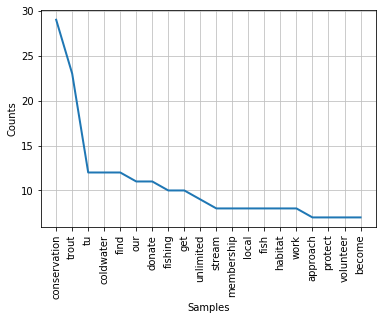

835


In [32]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_tu_tokens)
fdist.plot(20)
print(len(clean_tu_tokens))

NATURE CONSERVANCY:

There were some strange most common words that I don't know how to explain ('geonavtitle', 93), ('geolocationcountrycode', 93), ('geonavlink', 93), ('https', 93), ('geonavtarget', 93), ('geolocationstatecode', 90), ('usa', 53). They also had way higher word counts than should be possible. Therefore I expanded the most common words to 50 most common to get a better picture of what could be happening.

This resulted in more common word counts, which the most common words being more normal starting with the organization's name, the, nature, conservancy. Other words include: conservation, work, kpeople, new, explore, global, partners, local, success, results, world, climate, change,  and water

In [15]:
nature = open('www_nature_org_en-us_about-us_who-we-are_our-mission-vision-and-values.txt', "r", encoding="Latin-1")
nature_mission = nature.read() 
nature_tokens = nltk.word_tokenize(nature_mission)

clean_nature_tokens=[]

for tokens in nature_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_nature_tokens.append(tokens.lower())
    
nature_common_words=Counter(clean_nature_tokens).most_common(50) 
#print(nature_common_words)

##Removing weird words from original set

nature_common_words=nature_common_words[8:50]

print(nature_common_words)


[('the', 14), ('nature', 14), ('we', 13), ('mission', 11), ('conservancy', 9), ('conservation', 8), ('work', 7), ('us', 6), ('people', 6), ('new', 5), ('english', 5), ('donate', 5), ('explore', 5), ('global', 5), ('partners', 5), ('local', 5), ('success', 5), ('results', 4), ('world', 4), ('climate', 4), ('change', 4), ('water', 4), ('including', 4), ('get', 4), ('action', 4), ('vision', 4), ('values', 4), ('respect', 4), ('use', 4), ('sign', 4), ('up', 4), ('south', 3), ('canada', 3), ('india', 3), ('mexico', 3), ('science', 3), ('how', 3), ('tangible', 3), ('lasting', 3), ('challenges', 3), ('protect', 3), ('provide', 3)]


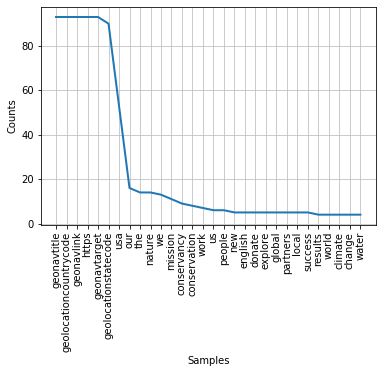

1519


In [33]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_nature_tokens)
fdist.plot(30)
print(len(clean_nature_tokens))

DUCKS UNLIMITED: (DU)

The list of most common 20 words include: du, conservation, habitat, waterfowl, ducks, work, land, wetlands, wildlife, partners, forests, and landowners

In [17]:
ducks = open('www_ducks_org_conservationhow-du-conserves-wetlands-and-waterfowl.txt', "r", encoding="Latin-1")
ducks_mission = ducks.read() 
ducks_tokens = nltk.word_tokenize(ducks_mission)

clean_ducks_tokens=[]

for tokens in ducks_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_ducks_tokens.append(tokens.lower())
    
ducks_common_words=Counter(clean_ducks_tokens).most_common(20) 
print(ducks_common_words)

[('du', 26), ('conservation', 14), ('habitat', 13), ('waterfowl', 10), ('work', 7), ('land', 7), ('events', 7), ('wetlands', 7), ('wildlife', 7), ('partners', 6), ('ducks', 6), ('forests', 6), ('landowners', 6), ('wetland', 6), ('state', 5), ('home', 5), ('programs', 5), ('duâ', 5), ('new', 5), ('north', 5)]


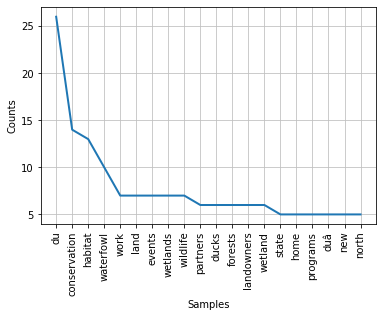

827


In [34]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_ducks_tokens)
fdist.plot(20)
print(len(clean_ducks_tokens))

BOONE AND CROCKETT CLUB:

The list of most common 20 words include: wildlife, conservation, boone, crockett, club, management, hunting, act, north, champion, game, and lead.

Wildlife and conservation are the top two words rather than the organization name

In [19]:
crockett = open('www_boone-crockett_orgsnapshot-boone-and-crockett-club.txt', "r", encoding="Latin-1")
crockett_mission = crockett.read() 
crockett_tokens = nltk.word_tokenize(crockett_mission)

clean_crockett_tokens=[]

for tokens in crockett_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_crockett_tokens.append(tokens.lower())
    
crockett_common_words=Counter(clean_crockett_tokens).most_common(20) 
print(crockett_common_words)

[('wildlife', 22), ('conservation', 18), ('boone', 10), ('crockett', 10), ('club', 10), ('management', 8), ('hunting', 7), ('act', 7), ('b', 6), ('c', 6), ('national', 6), ('including', 6), ('support', 6), ('first', 5), ('north', 5), ('champion', 5), ('game', 5), ('big', 4), ('history', 4), ('american', 4)]


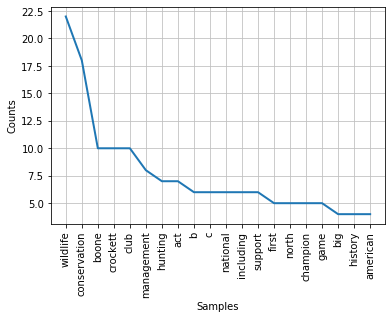

468


In [36]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_crockett_tokens)
fdist.plot(20)
print(len(clean_crockett_tokens))

OCEAN CONSERVANCY:

The list of 20 most common words include: ocean, conservancy, communities, people, wildlife, coastal, healthy, and world.

In [21]:
ocean = open('oceanconservancy_org_about.txt', "r", encoding="Latin-1")
ocean_mission = ocean.read() 
ocean_tokens = nltk.word_tokenize(ocean_mission)

clean_ocean_tokens=[]

for tokens in ocean_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_ocean_tokens.append(tokens.lower())
    
ocean_common_words=Counter(clean_ocean_tokens).most_common(20) 
print(ocean_common_words)

[('ocean', 60), ('conservancy', 19), ('i', 16), ('us', 12), ('like', 10), ('the', 8), ('solutions', 8), ('we', 8), ('communities', 6), ('people', 6), ('help', 6), ('wildlife', 6), ('our', 6), ('coastal', 6), ('every', 6), ('donate', 5), ('healthy', 5), ('today', 5), ('world', 5), ('more', 4)]


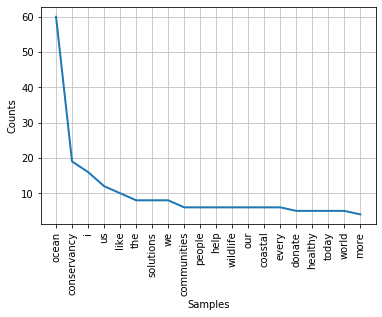

683


In [38]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_ocean_tokens)
fdist.plot(20)
print(len(clean_ocean_tokens))

DEFENDERS OF WILDLIFE:

The list of 20 most common words include: wildlife, speicies, our, conservation, north, defenders, we, us, work, voice, and america

Interesting that the full oranization does not appear in the first most common words.


In [23]:

defenders = open('defenders_orgabout.txt', "r", encoding="Latin-1")
defenders_mission = defenders.read() 
defenders_tokens = nltk.word_tokenize(defenders_mission)

clean_defenders_tokens=[]

for tokens in defenders_tokens:
    
    if tokens not in sw and tokens.isalpha():
        clean_defenders_tokens.append(tokens.lower())
    
defenders_common_words=Counter(clean_defenders_tokens).most_common(20) 
print(defenders_common_words)

[('wildlife', 13), ('species', 10), ('our', 8), ('conservation', 8), ('north', 8), ('defenders', 7), ('we', 6), ('us', 6), ('work', 5), ('get', 4), ('thank', 4), ('voice', 4), ('support', 4), ('america', 4), ('thriving', 4), ('waters', 4), ('alerts', 3), ('updates', 3), ('imperiled', 3), ('your', 3)]


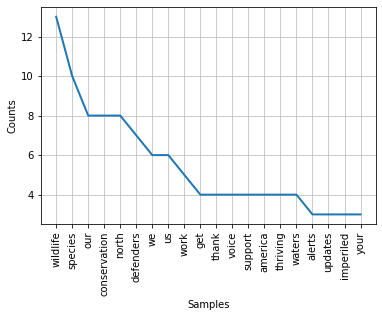

543


In [39]:
#A frequency distribution of the most common words
fdist=FreqDist(clean_defenders_tokens)
fdist.plot(20)
print(len(clean_defenders_tokens))

In [25]:
 #Create frequency histogram of 20 most common words and print summary of activity 

combined_common_words= clean_defenders_tokens + clean_bha_tokens + clean_rmef_tokens + clean_ocean_tokens + clean_crockett_tokens + clean_ducks_tokens + clean_tu_tokens + clean_wwf_tokens + clean_sierra_tokens

## The Nature Conservancy results were omitted because I couldn't figure out where the out of place words were coming from

#How many tokens are there total?
print(len(combined_common_words))

5720


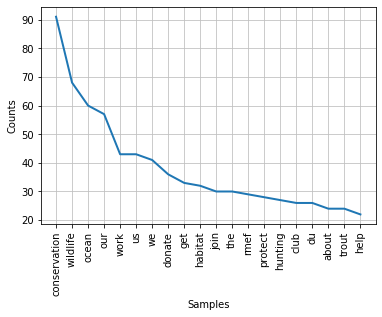

In [26]:
##Plotting combined list of words
fdist=FreqDist(combined_common_words)


fdist.plot(20)

